In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/email-spam-detection-dataset-classification/spam.csv


In [2]:
df = pd.read_csv("/kaggle/input/email-spam-detection-dataset-classification/spam.csv", encoding = 'latin_1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df.columns = ['spam','text']
df.head()

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['spam'].value_counts()

ham     4825
spam     747
Name: spam, dtype: int64

In [6]:
y = df['spam']
text = df['text']

In [7]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [8]:
def preprocess_data(text): 
    preprocess = []
    ps = PorterStemmer()
    
    for sentence in text: 
        word = word_tokenize(sentence)
        email = ''
        
        for w in word: 
            if w not in stopwords.words("english"):
                w = ps.stem(w)
                email += (w + ' ')
        preprocess.append(email)
    
    return preprocess

In [9]:
X = preprocess_data(text)

In [10]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.2, random_state = 1)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [12]:
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

In [13]:
print(X_train.shape, X_test.shape)

(4457, 6511) (1115, 6511)


In [14]:
#Funtion to build and visualise a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def visualise_predictions(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} Accuracy Score:', '{:.2%}'.format(accuracy_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='magma')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

Logistic Regression  Accuracy Score: 97.76%
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       976
        spam       0.99      0.83      0.90       139

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.98      1115



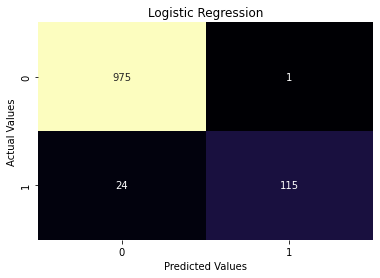

array([[975,   1],
       [ 24, 115]])

In [15]:
#1. LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

visualise_predictions(y_test, pred, "Logistic Regression", "Logistic Regression ")

Random Forest  Accuracy Score: 98.65%
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       976
        spam       0.97      0.92      0.94       139

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



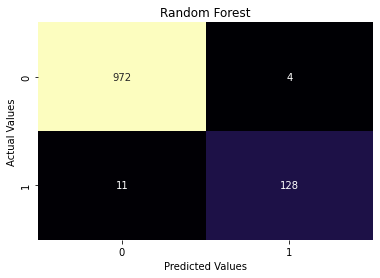

array([[972,   4],
       [ 11, 128]])

In [16]:
#2. RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

visualise_predictions(y_test, pred, "Random Forest", "Random Forest ")

SVM Classifier Accuracy Score: 99.10%
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       976
        spam       1.00      0.93      0.96       139

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



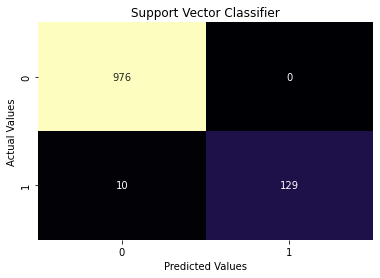

array([[976,   0],
       [ 10, 129]])

In [17]:
#3. SVM Classifier
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10)
svm.fit(X_train, y_train)
pred = svm.predict(X_test)

visualise_predictions(y_test, pred, 'Support Vector Classifier', 'SVM Classifier')